# Segmenter une image pixel à pixel

Il est aujourd'hui assez facile de construire une boîte englobante autour d'un visage dans une image. Le deep learning permet d'extraire précisément les pixels du visage.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Chargement du modèle

In [3]:
from code_beatrix.ai import DLImageSegmentation
model = DLImageSegmentation(fLOG=print)

[DLImageSegmentation] download model 'FCN8s'
[DLImageSegmentation] [C:\Users\xavie/data/models/chainer/fcn8s_from_caffe.npz] Checking md5 (256c2a8235c1c65e62e48d3284fbd384)

[DLImageSegmentation] load_npz 'C:\Users\xavie/data/models/chainer/fcn8s_from_caffe.npz'
[DLImageSegmentation] class_name '['background' 'aeroplane' 'bicycle' 'bird' 'boat' 'bottle' 'bus' 'car'
 'cat' 'chair' 'cow' 'diningtable' 'dog' 'horse' 'motorbike' 'person'
 'potted plant' 'sheep' 'sofa' 'train' 'tv/monitor']'
[DLImageSegmentation] cpu


## Sur une petite image

In [4]:
img = 'images/Tesla_circa_1890c.jpg'

In [5]:
pred = model.predict(img)

In [6]:
viz = model.plot(img, pred)

c:\Python363_x64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


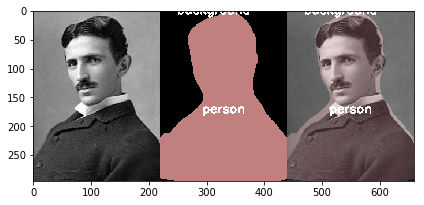

In [7]:
import skimage.io as skio
skio.imshow(viz)

## Sur une grande image

In [8]:
img = 'images/h2015_2.jpg'

In [9]:
import skimage.io
skimg = skimage.io.imread(img)
skimg.shape

(912, 1368, 3)

On utilise la fonction [resize](http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=resize#skimage.transform.resize).

In [10]:
small = skimage.transform.resize(skimg, (912//2, 1368//2, 3))

c:\Python363_x64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


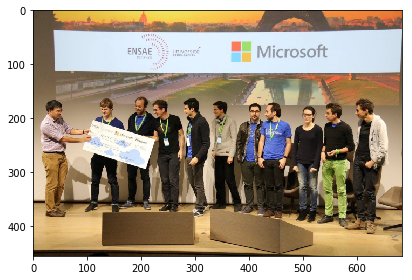

In [11]:
skio.imshow(small)

In [12]:
pred = model.predict(small)

In [13]:
viz = model.plot(small, pred)

c:\Python363_x64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


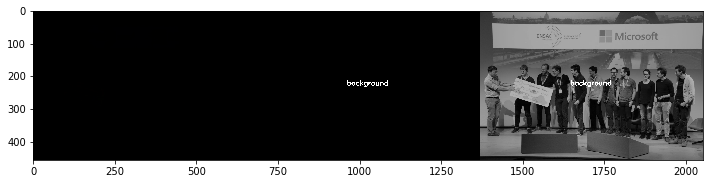

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(viz)

Petit problème de couleur.